# **Regression Practice**

In [35]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statistics

## Data Setup and Wrangling

In [2]:
diabetes_data = load_diabetes()
#using built in diabetes dataset from sklearn

In [3]:
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
type(diabetes_data['data'])

numpy.ndarray

In [5]:
#organizing the data
data = diabetes_data['data']
xData = pd.DataFrame(data, columns = diabetes_data['feature_names'])
y = pd.DataFrame(diabetes_data['target'])
xData

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [7]:
data.shape

(442, 10)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xData, y, test_size=0.30, random_state=42)

In [9]:
X_train
X_test
y_train
y_test

,0
287,219.0
211,70.0
72,202.0
321,230.0
73,111.0
...,...
238,257.0
26,137.0
7,63.0
401,93.0


## Linear Regression

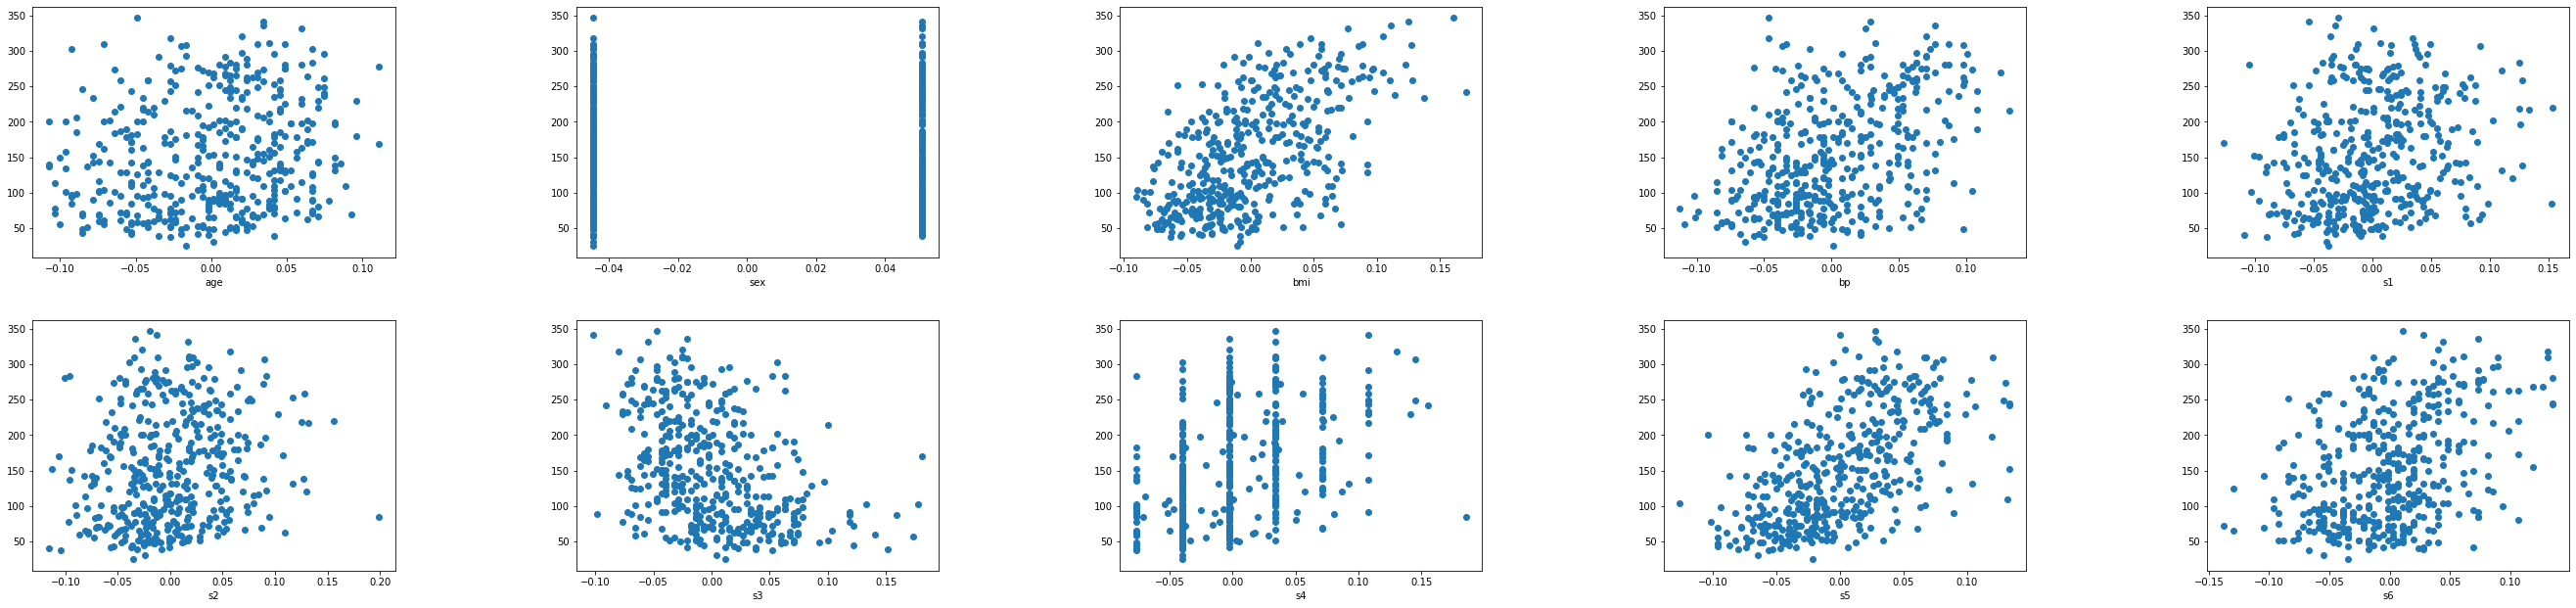

In [10]:
#creating a grid of regressions between each individual factor

#looping through each factor, creating the regressions
xcolumn = xData.columns
j = 1
for i in xcolumn:
    ax1 = plt.subplot(2,5,j)
    ax1.set(xlabel=i)
    plt.scatter(xData[i], y.iloc[:,0])
    j = j+1
    
# adjusting the graph size and spacing
plt.subplots_adjust(left=-3,
                    bottom=-1, 
                    right=3, 
                    top=1, 
                    wspace=.5, 
                    hspace=.25)




### First Order

In [11]:
#first order regression with a singular variable
#X
reg = LinearRegression().fit(X_train[['age']], y_train)
reg = LinearRegression().fit(X_train['age'].to_frame(), y_train)

print("coefficient:",reg.coef_)
print("intercept:",reg.intercept_)

coefficient: [[323.57449776]]
intercept: [153.53809365]


In [12]:
y_hat_training = reg.predict(X_train['age'].to_frame())
y_hat_testing = reg.predict(X_test['age'].to_frame())

In [13]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print("r squared:",r_sq)
print("intercept:",model.intercept_)
print("coefficients:",model.coef_)

r squared: 0.5244132008226972
intercept: [151.00818273]
coefficients: [[  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
   506.761149    121.14845948  288.02932495  659.27133846   41.37536901]]


In [14]:
r_sq = model.score(X_test, y_test)
print("r squared:",r_sq)
print("intercept:",model.intercept_)
print("coefficients:",model.coef_)

r squared: 0.47729201741573324
intercept: [151.00818273]
coefficients: [[  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
   506.761149    121.14845948  288.02932495  659.27133846   41.37536901]]


### 2nd order

In [15]:
# 2nd order
transformer = PolynomialFeatures(degree=2, include_bias=False) #2nd degree polynomial
#restructuring data
transformer.fit(X_train)
x_ = transformer.transform(X_train)
# model
model = LinearRegression().fit(x_, y_train)
r_sq = model.score(x_, y_train)
print("r squared:",r_sq)
print("intercept",model.intercept_)
#print(model.coef_)

r squared: 0.6081425033199093
intercept [-377.12461765]


In [16]:
# transformer = PolynomialFeatures(degree=2, include_bias=False)
# transformer.fit(dfTesting)  Ctrl + /
x_ = transformer.transform(X_test)
# model = LinearRegression().fit(x_, yTesting)
r_sq = model.score(x_, y_test)
print("r squared:",r_sq)
print("intercept",model.intercept_)
#print(model.coef_)

r squared: 0.4119057303224475
intercept [-377.12461765]


#### Looks like overfitting...

### 3rd order

In [17]:
# 3rd order 
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(X_train)
x_ = transformer.transform(X_train)
model = LinearRegression().fit(x_, y_train)
r_sq = model.score(x_, y_train)
print("r squared:",r_sq)
print("intercept",model.intercept_)
#print(model.coef_)

r squared: 0.9313284497838918
intercept [-4094948.46649885]


In [18]:
# transformer = PolynomialFeatures(degree=3, include_bias=False)
# transformer.fit(dfTesting)
x_ = transformer.transform(X_test)
# model = LinearRegression().fit(x_, yTesting)
r_sq = model.score(x_, y_test)
print("r squared:",r_sq)
print("intercept",model.intercept_)
#print(model.coef_)

r squared: -1704695.5627076481
intercept [-4094948.46649885]


#### Definitely overfitting

### Final Regression

In [51]:
reg = LinearRegression().fit(X_train, y_train)
print('training score is {}'.format(reg.score(X_train, y_train)))
print('testing score is {}'.format(reg.score(X_test, y_test)))

training score is 0.5244132008226972
testing score is 0.47729201741573324


# Feature selection


## Dropping one feature at a time

In [19]:
xcolumn

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [20]:
training_scores = []
testing_scores = []
drop_columns = []

xcolumn = xData.columns
print(xcolumn)
print('\n')

for i in xData.columns:
    x_columns_drop_one = xcolumn.drop(i)
    print(x_columns_drop_one)
    print('Dropped column: {}'.format(i))
    reg = LinearRegression().fit(X_train[x_columns_drop_one], y_train)
    print('training score is {}'.format(reg.score(X_train[x_columns_drop_one], y_train)))
    print('testing score is {}'.format(reg.score(X_test[x_columns_drop_one], y_test)))
    print('\n')
    
    training_scores.append(reg.score(X_train[x_columns_drop_one], y_train))
    testing_scores.append(reg.score(X_test[x_columns_drop_one], y_test))
    drop_columns.append(i)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Dropped column: age
training score is 0.5241657255386687
testing score is 0.47998407006997945


Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Dropped column: sex
training score is 0.5040698747077487
testing score is 0.468210441185399


Index(['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Dropped column: bmi
training score is 0.45239914225130984
testing score is 0.4118539957333618


Index(['age', 'sex', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Dropped column: bp
training score is 0.4845422596518272
testing score is 0.4879195920552927


Index(['age', 'sex', 'bmi', 'bp', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Dropped column: s1
training score is 0.5187591697596312
testing score is 0.47624316357865326


Index(['age', 'sex', 'bmi', 'bp', 

In [50]:
#finding the mean for graph 
#print(statistics.mean(training_scores))
#statistics.mean(testing_scores)

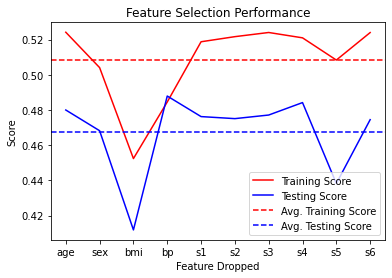

In [49]:
plt.plot(drop_columns, training_scores, 'r-',label='Training Score')
plt.plot(drop_columns, testing_scores, 'b-',label='Testing Score')
plt.axhline(y = 0.5082958218997156, color = 'red', linestyle = '--',label='Avg. Training Score')
plt.axhline(y = 0.467335261691163, color = 'blue', linestyle = '--',label='Avg. Testing Score')
plt.xlabel("Feature Dropped")
plt.ylabel("Score")
plt.title("Feature Selection Performance")
legend = plt.legend(loc ='lower right')
#plt.legend(["Training Score", "Testing Score"], loc ="lower right")